In [2]:
import h5py

with h5py.File("train.h5", "r") as f_train:
    print("Datasets en train.h5:")
    print(list(f_train.keys()))

Datasets en train.h5:
['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z', 'y']


In [4]:
import h5py

with h5py.File("test.h5", "r") as f_train:
    print("Datasets en train.h5:")
    print(list(f_train.keys()))

Datasets en train.h5:
['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z']


In [3]:
import h5py
import numpy as np

# Carga de entrenamiento
with h5py.File("train.h5", "r") as f_train:
    # Combina todos los datasets de características en un solo array
    X_train = np.hstack([
        np.array(f_train['body_acc_x']),
        np.array(f_train['body_acc_y']),
        np.array(f_train['body_acc_z']),
        np.array(f_train['body_gyro_x']),
        np.array(f_train['body_gyro_y']),
        np.array(f_train['body_gyro_z']),
        np.array(f_train['total_acc_x']),
        np.array(f_train['total_acc_y']),
        np.array(f_train['total_acc_z'])
    ])
    y_train = np.array(f_train['y'])

# Verifica formas
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (7352, 1152)
y_train: (7352,)


C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\48600414.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_train['body_acc_x']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\48600414.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_train['body_acc_y']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\48600414.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_train['body_acc_z']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\48600414.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_train['body_gyro_x']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\48600414.py:12: DeprecationWarning: `

In [5]:
import h5py
import numpy as np

# Carga de prueba (sin etiquetas)
with h5py.File("test.h5", "r") as f_test:
    # Combina todos los datasets de características en un solo array
    X_test = np.hstack([
        np.array(f_test['body_acc_x']),
        np.array(f_test['body_acc_y']),
        np.array(f_test['body_acc_z']),
        np.array(f_test['body_gyro_x']),
        np.array(f_test['body_gyro_y']),
        np.array(f_test['body_gyro_z']),
        np.array(f_test['total_acc_x']),
        np.array(f_test['total_acc_y']),
        np.array(f_test['total_acc_z'])
    ])

# Verifica forma
print("X_test:", X_test.shape)

X_test: (2947, 1152)


C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\3202983455.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_test['body_acc_x']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\3202983455.py:9: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_test['body_acc_y']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\3202983455.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_test['body_acc_z']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\3202983455.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(f_test['body_gyro_x']),
C:\Users\u63055\AppData\Local\Temp\1\ipykernel_9840\3202983455.py:12: DeprecationWarn

Accuracy: 0.9347382732834806
F1 Score: 0.9367689362495973
Confusion Matrix:
 [[236   8   3   0   0   0]
 [  3 196   1   0   0   0]
 [ 11   1 194   0   0   0]
 [  0   0   0 228  34   0]
 [  0   1   0  34 241   0]
 [  0   0   0   0   0 280]]


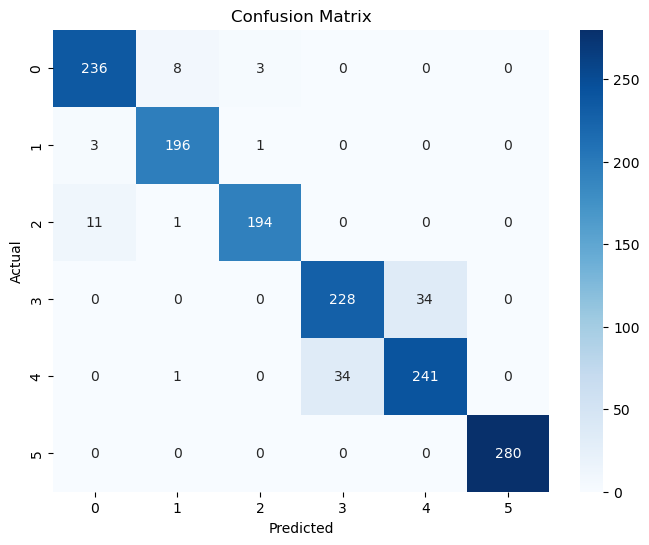

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Divide los datos en entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Entrena un modelo SVM
clf = SVC(kernel='rbf')
clf.fit(X_train_split, y_train_split)

# Evalúa el modelo
y_pred = clf.predict(X_val_split)
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print("F1 Score:", f1_score(y_val_split, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_val_split, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_split, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define el modelo SVC
svc = SVC()

# Define los parámetros para la búsqueda
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Configura GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_split, y_train_split)

# Imprime los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)